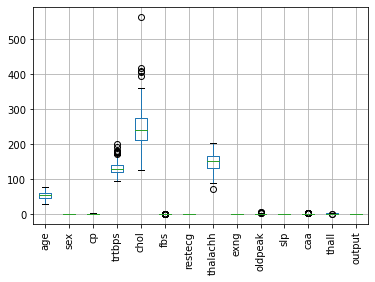

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
df = pd.read_csv('archive/heart.csv')

# Create a box plot for each column
df.boxplot()
plt.xticks(rotation=90)
plt.show()

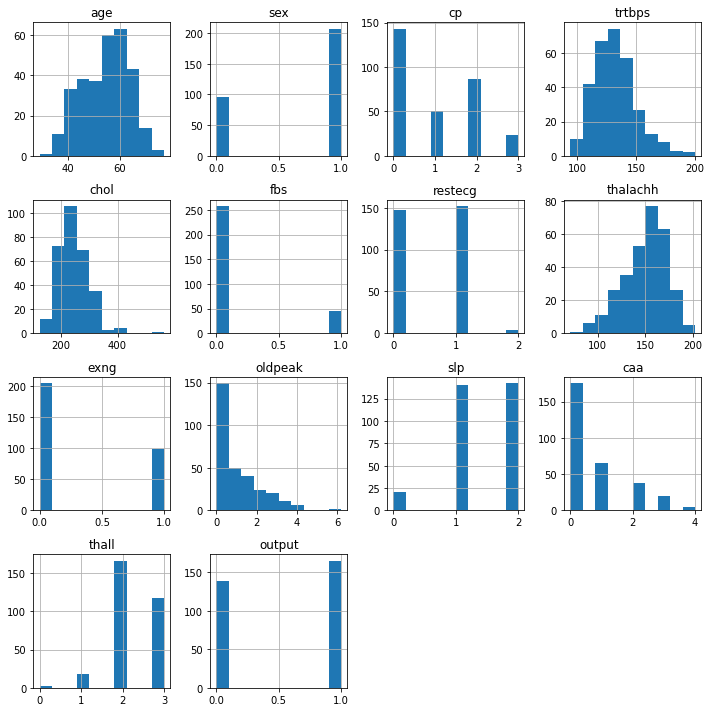

In [2]:
# Create a histogram for each column
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

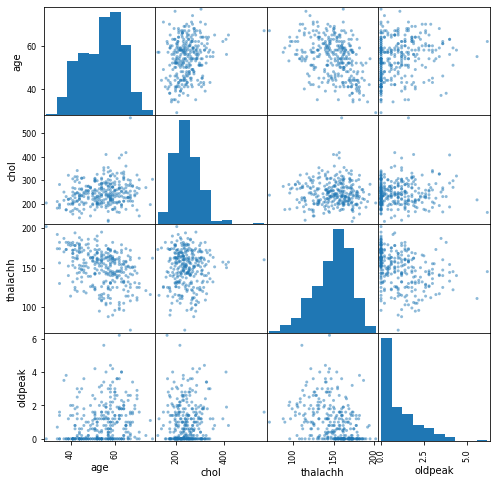

In [3]:
from pandas.plotting import scatter_matrix

# Use numeric columns for checking outliers
selected_columns = ['age', 'chol', 'thalachh', 'oldpeak']

# Create scatter matrix for selected columns
scatter_matrix(df[selected_columns], figsize=(8, 8))
plt.show()

Z score outliers:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
48    53    0   2     128   216    0        0       115     0      0.0    2   
85    67    0   2     115   564    0        0       160     0      1.6    1   
204   62    0   0     160   164    0        0       145     0      6.2    0   
221   55    1   0     140   217    0        1       111     1      5.6    0   
223   56    0   0     200   288    1        0       133     1      4.0    0   
281   52    1   0     128   204    1        1       156     1      1.0    1   

     caa  thall  output  
48     0      0       1  
85     0      3       1  
204    3      3       0  
221    0      3       0  
223    2      3       0  
281    0      0       0  


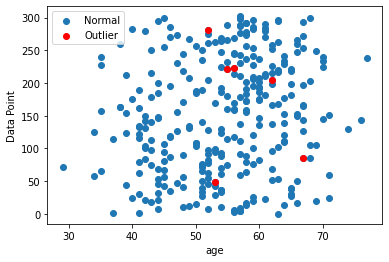

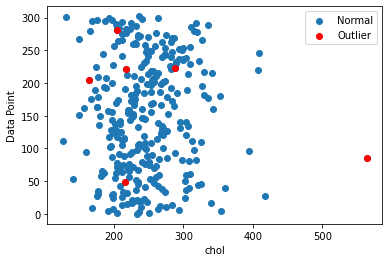

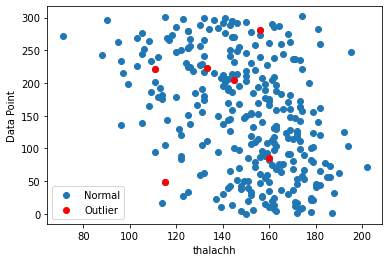

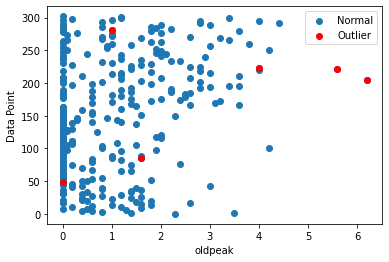

In [4]:
import numpy as np
from graph import plot_outliers

z_score_threshold = 3.5

# Calculate z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Identify outliers based on z-scores
z_scores_outlier = (z_scores > z_score_threshold).any(axis=1)
z_scores_outlier_df = df[z_scores_outlier]

# Print the outliers
print("Z score outliers:")
print(z_scores_outlier_df)

# Call the function to generate scatter plots
plot_outliers(df, selected_columns, z_scores_outlier_df)

In [5]:
from KNN import detect_outliers

# Specify the number of neighbors (k) and the distance threshold
k = 3
KNN_threshold = 14

# Call the function to detect outliers
KNN_outliers_df = detect_outliers(df, features=selected_columns, k=k, threshold=KNN_threshold)

# Print the outliers
print("KNN outliers:")
print(KNN_outliers_df)

KNN outliers:
     age  chol  thalachh  oldpeak
85    67   564       160      1.6
111   57   126       173      0.2
272   67   237        71      1.0
301   57   131       115      1.2


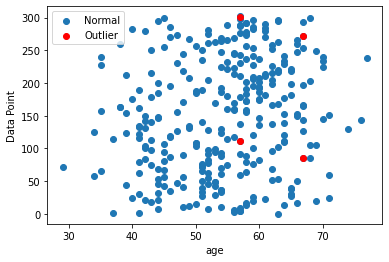

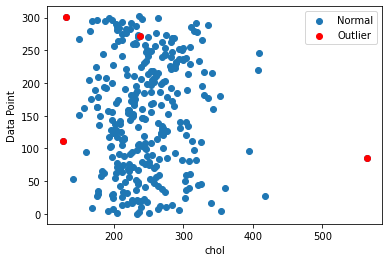

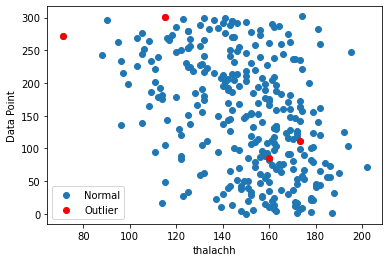

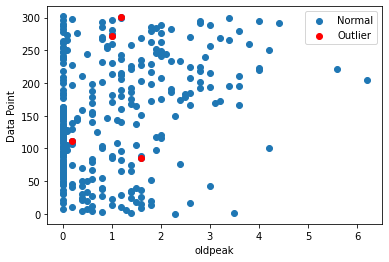

In [6]:
# Create scatter plots for the features
plot_outliers(df, selected_columns, KNN_outliers_df)